# Use case:
## Predict best price for VW Passat B6 TDI basing on real offers

### Settings

In [1]:
percent_of_test_data = 25
main_url = 'https://www.otomoto.pl/osobowe/volkswagen/passat/b6-2005-2010/?search%5Bfilter_enum_fuel_type%5D%5B0%5D=diesel&search%5Bfilter_enum_damaged%5D=0&search%5Bfilter_enum_registered%5D=1&search%5Bcountry%5D='

### Prepare environment

In [2]:
import sys
sys.path.append('/Users/tomek/OneDrive/Projects/Machine Learning/car-price-prediction')

import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import car_price_prediction

### Count pages with offers

In [3]:
pages = car_price_prediction.count_pages(main_url)
print("Found %d pages" % pages)

Found 28 pages


### Collect samples from those offers

In [4]:
Xy = car_price_prediction.collect_data(main_url,pages)

print("Collected %d samples" % len(Xy))
#print(Xy.shape)
print("\nLast 10 samples:")
print("[year, mileage, capacity, price]")
np.set_printoptions(precision=0)
print(Xy[-10:])

	Parsing page: 1

	Parsing page: 2

	Parsing page: 3

	Parsing page: 4

	Parsing page: 5

	Parsing page: 6

	Parsing page: 7

	Parsing page: 8

	Parsing page: 9

	Parsing page: 10

	Parsing page: 11

	Parsing page: 12

	Parsing page: 13

	Parsing page: 14

	Parsing page: 15

	Parsing page: 16

	Parsing page: 17

	Parsing page: 18

	Parsing page: 19

	Parsing page: 20

	Parsing page: 21

	Parsing page: 22

	Parsing page: 23

	Parsing page: 24

	Parsing page: 25

	Parsing page: 26

	Parsing page: 27

	Parsing page: 28



Collected 863 samples

Last 10 samples:
[year, mileage, capacity, price]
[[   2007.  329500.    2000.   21500.]
 [   2008.  266000.    1968.   25900.]
 [   2006.  232922.    2000.   19900.]
 [   2006.  245341.    2000.   19900.]
 [   2008.  167000.    2000.   29900.]
 [   2007.  300000.    1900.   14000.]
 [   2007.  164000.    2000.   25900.]
 [   2008.  185600.    1968.   22500.]
 [   2010.  197486.    1968.   33700.]
 [   2008.  164000.    1968.   27500.]]


## Let's have some fun with that data

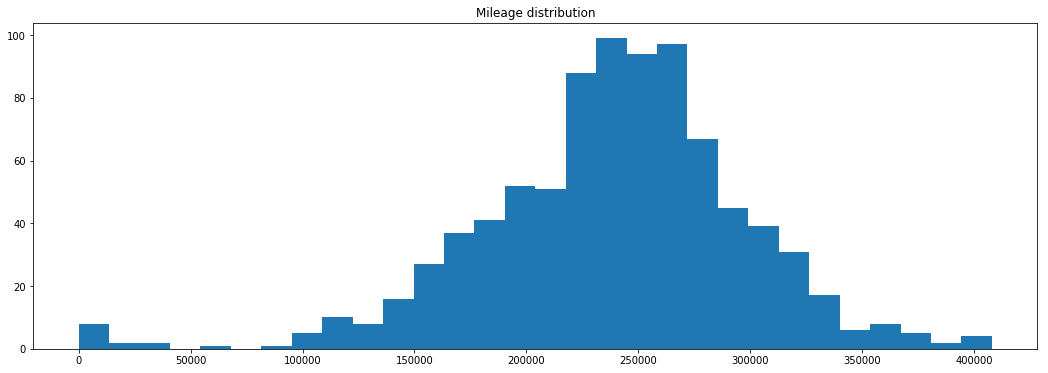

In [5]:
plt.figure(figsize=(18,6))
plt.hist(Xy[:,1],30)
plt.title("Mileage distribution")
plt.show()

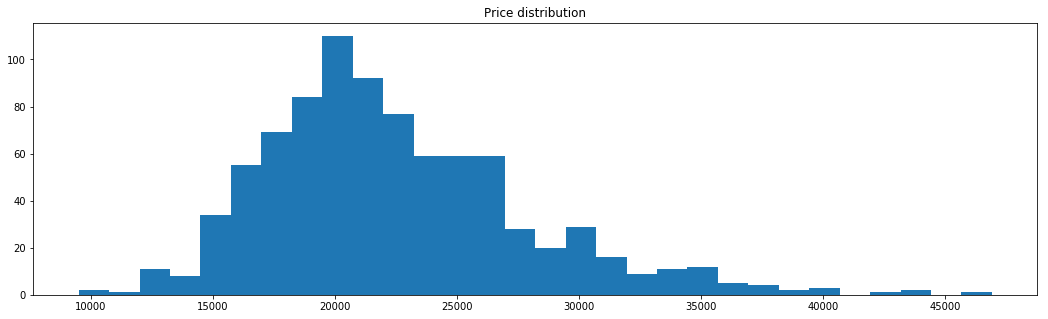

In [6]:
plt.figure(figsize=(18,5))
plt.hist(Xy[:,3],30)
plt.title("Price distribution")
plt.show()

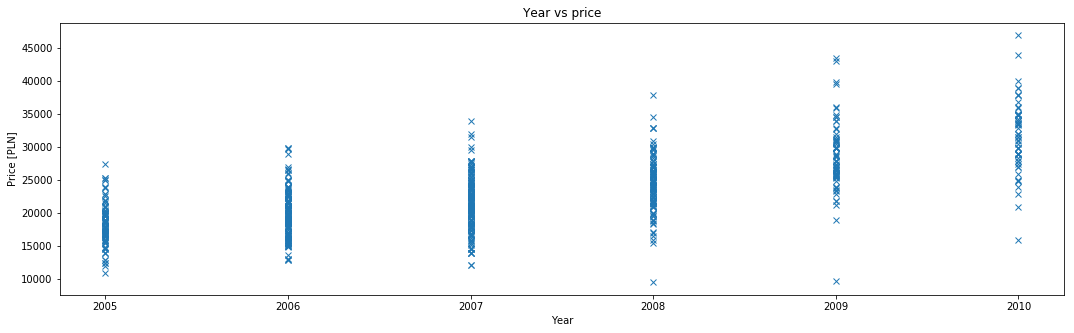

In [7]:
plt.figure(figsize=(18,5))
plt.title("Year vs price")
plt.xlabel("Year")
plt.ylabel("Price [PLN]")
plt.plot(Xy[:,0],Xy[:,3],"x")
plt.show()

In [8]:
plt.figure(figsize=(18,5))
plt.title("Mileage vs price")
plt.xlabel("Mileage [km]")
plt.ylabel("Price [PLN]")
plt.plot(Xy[:,1],Xy[:,3],"x")
plt.show()

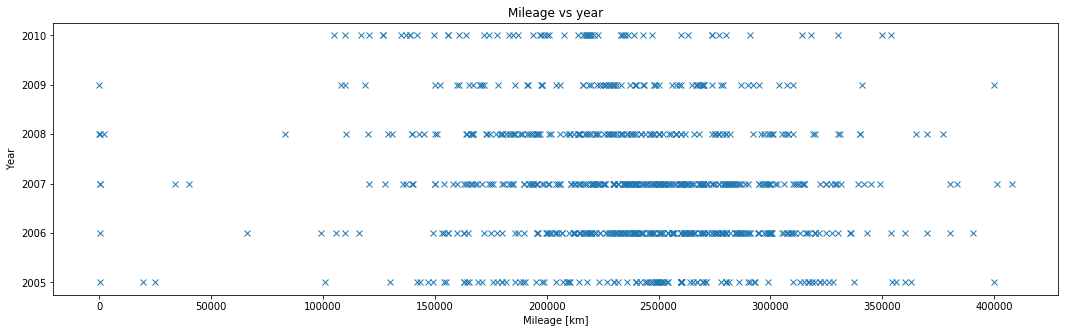

In [9]:
plt.figure(figsize=(18,5))
plt.title("Mileage vs year")
plt.xlabel("Mileage [km]")
plt.ylabel("Year")
plt.plot(Xy[:,1],Xy[:,0],"x")
plt.show()

### Divide samples to train and test

In [10]:
X_train, y_train, X_test, y_test = car_price_prediction.split_data(Xy, percent_of_test_data) 

print('Training samples: %d' % len(X_train))
print('Test samples: %d' % len(X_test))


Training samples: 647
Test samples: 216


### Let's train!

In [11]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

np.set_printoptions(formatter={'float_kind': '{:f}'.format})
print('Interceptor: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Interceptor:  [-5024747.427572]
Coefficients:  [[2517.580857 -0.023656 -0.012603]]


### Let's test

In [12]:
y_pred = regr.predict(X_test)

#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.43


In [16]:
plt.figure(figsize=(18,5))
plt.plot(y_test, label='Real prices')
plt.plot(y_pred, label='Predicted prices')
plt.xticks(())
plt.ylabel("Price [PLN]")
plt.legend()
plt.show()

## What is the best price for... 

### Passat B6 1.9 TDI 2009 with 188 000 mileage

 - 1.6 = 1598
 - 1.9 = 1896
 - 2.0 = 1968

In [14]:
price_pred = regr.predict([[2009,180000, 1896]])
print('The best price for VW Passat B6 1.9 TDI 2009 with 188 000 mileage is %.2f PLN' % price_pred[0][0])

The best price for VW Passat B6 1.9 TDI 2009 with 188 000 mileage is 28790.55 PLN


### Passat B6 2.0 TDI 2006 with 288 000 mileage

In [15]:
price_pred = regr.predict([[2006,288000, 1968]])
print('The best price for VW Passat B6 2.0 TDI 2006 with 288 000 mileage is  %.2f PLN' % price_pred[0][0])

The best price for VW Passat B6 2.0 TDI 2006 with 288 000 mileage is  18682.06 PLN
